In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
data=pd.read_csv("ResultAnalysis - ResultAnalysis.csv")
data.head()


,Stud No,Roll No,Name,HMTS 3201,INCO 3016,CSEN 3201,CSEN 3202,CSEN 3233,CHEN 3221,CSEN3251,CSEN3252,CSEN3293,SGPA5,SGPA6,YGPA3,RESULT
0,1,12621001001,ABCD-ds-1,C (18),A (0),B (28),A (32),D (15),B (21),A (12),B (10.5),B (14),5.74,6.84,6.26,P
1,2,12621001002,ABCD-ds-2,A (24),A (0),E (36),D (20),C (18),B (21),B (10.5),B (10.5),A (16),6.80,7.09,6.94,P
2,3,12621001004,ABCD-ds-3,E (27),B (0),O (40),A (32),A (24),E (27),A (12),O (15),B (14),8.54,8.68,8.61,P
3,4,12621001005,ABCD-ds-4,O (30),A (0),O (40),O (40),E (27),B (21),O (15),O (15),A (16),9.60,9.27,9.45,P
4,5,12621001006,ABCD-ds-5,A (24),E (0),E (36),E (36),B (21),A (24),O (15),E (13.5),A (16),8.86,8.43,8.66,P


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stud No    561 non-null    int64  
 1   Roll No    561 non-null    int64  
 2   Name       561 non-null    object 
 3   HMTS 3201  561 non-null    object 
 4   INCO 3016  561 non-null    object 
 5   CSEN 3201  561 non-null    object 
 6   CSEN 3202  561 non-null    object 
 7   CSEN 3233  561 non-null    object 
 8   CHEN 3221  561 non-null    object 
 9   CSEN3251   561 non-null    object 
 10  CSEN3252   561 non-null    object 
 11  CSEN3293   561 non-null    object 
 12  SGPA5      561 non-null    float64
 13  SGPA6      561 non-null    float64
 14  YGPA3      561 non-null    float64
 15  RESULT     561 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 70.3+ KB


In [3]:
data.describe()


,Stud No,Roll No,SGPA5,SGPA6,YGPA3
count,561.000000,5.610000e+02,561.000000,561.000000,561.000000
mean,281.000000,1.262110e+10,7.857308,7.773529,7.818307
std,162.091024,3.162391e+05,1.386407,1.238304,1.275349
min,1.000000,1.262000e+10,3.160000,2.950000,3.190000
25%,141.000000,1.262100e+10,7.100000,7.110000,7.100000
50%,281.000000,1.262100e+10,8.070000,7.950000,7.960000
75%,421.000000,1.262102e+10,8.880000,8.660000,8.800000
max,561.000000,1.262200e+10,10.000000,10.000000,9.960000


In [4]:
data.isnull().sum()


Stud No      0
Roll No      0
Name         0
HMTS 3201    0
INCO 3016    0
CSEN 3201    0
CSEN 3202    0
CSEN 3233    0
CHEN 3221    0
CSEN3251     0
CSEN3252     0
CSEN3293     0
SGPA5        0
SGPA6        0
YGPA3        0
RESULT       0
dtype: int64

In [5]:
data.nunique()

Stud No      561
Roll No      524
Name         561
HMTS 3201      9
INCO 3016     14
CSEN 3201      8
CSEN 3202     13
CSEN 3233      8
CHEN 3221      8
CSEN3251       7
CSEN3252       8
CSEN3293       7
SGPA5        189
SGPA6        180
YGPA3        225
RESULT         2
dtype: int64

In [6]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical or continuous Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'HMTS 3201', 'INCO 3016', 'CSEN 3201', 'CSEN 3202', 'CSEN 3233',
       'CHEN 3221', 'CSEN3251', 'CSEN3252', 'CSEN3293', 'RESULT'],
      dtype='object')
Numerical or continuous Variables:
['Stud No', 'Roll No', 'SGPA5', 'SGPA6', 'YGPA3']


In [7]:
# Summary statistics for SGPA and YGPA
print("Summary Statistics:")
print(data[['SGPA5', 'SGPA6', 'YGPA3']].describe())


Summary Statistics:
            SGPA5       SGPA6       YGPA3
count  561.000000  561.000000  561.000000
mean     7.857308    7.773529    7.818307
std      1.386407    1.238304    1.275349
min      3.160000    2.950000    3.190000
25%      7.100000    7.110000    7.100000
50%      8.070000    7.950000    7.960000
75%      8.880000    8.660000    8.800000
max     10.000000   10.000000    9.960000


Correlation Between SGPA and YGPA:
         SGPA5     SGPA6     YGPA3
SGPA5  1.00000  0.875210  0.974600
SGPA6  0.87521  1.000000  0.961235
YGPA3  0.97460  0.961235  1.000000


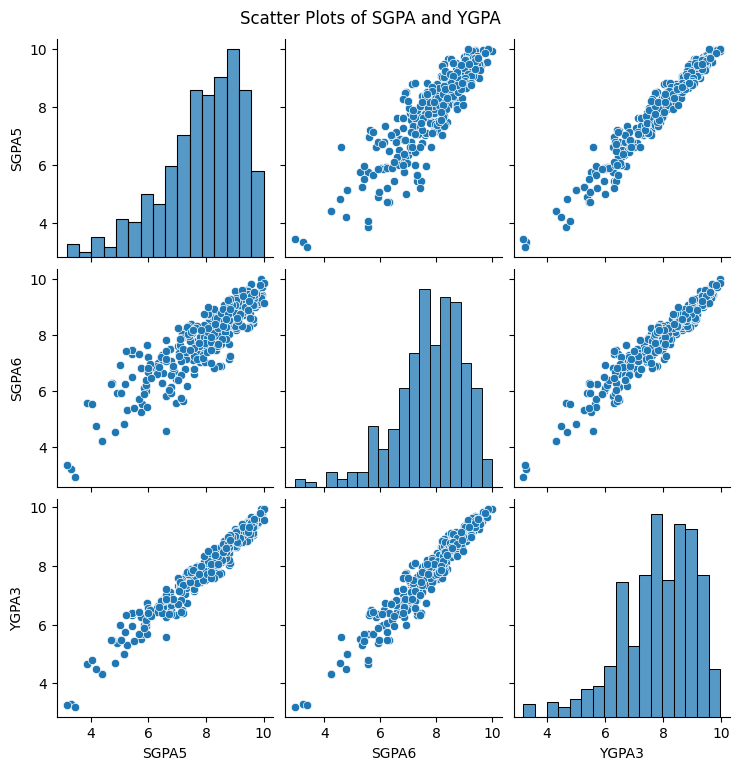

In [8]:
# Correlation analysis
correlation = data[['SGPA5', 'SGPA6', 'YGPA3']].corr()
print("Correlation Between SGPA and YGPA:")
print(correlation)

sns.pairplot(data[['SGPA5', 'SGPA6', 'YGPA3']])
plt.suptitle("Scatter Plots of SGPA and YGPA", y=1.02)
plt.show()




Result Distribution:
RESULT
P     467
XP     94
Name: count, dtype: int64


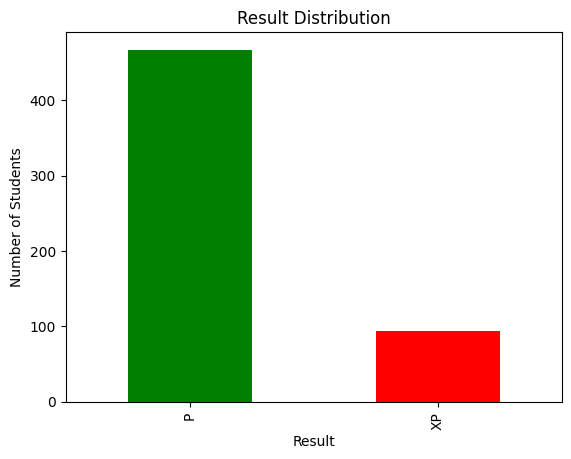

In [9]:
# Count students by result
result_counts = data['RESULT'].value_counts()

print("Result Distribution:")
print(result_counts)

# Visualize result distribution
result_counts.plot(kind='bar', color=['green', 'red'], title='Result Distribution')
plt.xlabel("Result")
plt.ylabel("Number of Students")
plt.show()


In [10]:
# Get students with top YGPA
top_performers = data.nlargest(5, 'YGPA3')

print("Top Performers Based on YGPA:")
print(top_performers[['Roll No', 'Name', 'YGPA3']])


Top Performers Based on YGPA:
         Roll No         Name  YGPA3
167  12621019021  ABCD-ds-168   9.96
131  12621001140  ABCD-ds-132   9.94
449  12621003148  ABCD-ds-450   9.94
113  12621001122  ABCD-ds-114   9.84
316  12620003009  ABCD-ds-317   9.84


Performance_Trend
Declined      340
Improved      212
Consistent      9
Name: count, dtype: int64


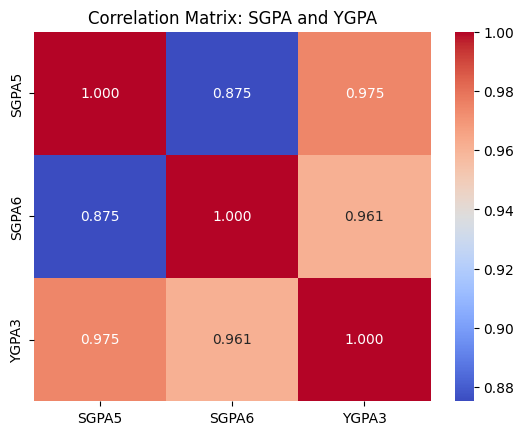

In [11]:
# Calculate performance change
data['SGPA_Change'] = data['SGPA6'] - data['SGPA5']

# Categorize performance trends
data['Performance_Trend'] = data['SGPA_Change'].apply(
    lambda x: 'Improved' if x > 0 else 'Declined' if x < 0 else 'Consistent'
)

print(data['Performance_Trend'].value_counts())

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix: SGPA and YGPA')
plt.show()


In [12]:
df_result = data
X = df_result[['SGPA5','SGPA6','YGPA3']]
X

,SGPA5,SGPA6,YGPA3
0,5.74,6.84,6.26
1,6.80,7.09,6.94
2,8.54,8.68,8.61
3,9.60,9.27,9.45
4,8.86,8.43,8.66
...,...,...,...
556,6.00,6.81,6.40
557,9.48,9.19,9.33
558,8.43,7.69,8.06
559,6.62,7.14,6.88


In [13]:
X = df_result[['SGPA5']]
y = df_result[['YGPA3']] # dependent
y


,YGPA3
0,6.26
1,6.94
2,8.61
3,9.45
4,8.66
...,...
556,6.40
557,9.33
558,8.06
559,6.88


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train


,SGPA5
456,8.82
208,7.90
113,9.96
194,7.84
76,6.90
...,...
277,7.80
9,8.80
359,7.52
192,8.76


In [15]:
X_test


,SGPA5
505,8.81
408,9.46
66,6.52
338,9.46
233,5.44
...,...
159,8.96
12,8.54
343,7.06
142,6.32


In [16]:
y_train

,YGPA3
456,8.09
208,7.63
113,9.84
194,7.98
76,6.81
...,...
277,7.45
9,8.44
359,7.86
192,8.55


In [17]:
y_test


,YGPA3
505,8.66
408,9.50
66,6.80
338,9.54
233,6.38
...,...
159,8.73
12,8.28
343,7.19
142,6.64


In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [20]:
y_pred_test

array([[8.67573424],
       [9.25859162],
       [6.62228288],
       [9.25859162],
       [5.65384294],
       [8.30808575],
       [8.48742648],
       [6.69401917],
       [6.10219476],
       [9.07925089],
       [5.92285403],
       [8.33498686],
       [9.11511903],
       [6.10219476],
       [5.85111774],
       [6.69401917],
       [8.03907465],
       [8.91784423],
       [7.85973392],
       [6.44294215],
       [9.18685532],
       [8.20944834],
       [9.31239384],
       [6.15599698],
       [7.77006356],
       [7.21410729],
       [7.89560207],
       [7.3396458 ],
       [9.31239384],
       [6.62228288],
       [7.78799763],
       [7.3396458 ],
       [7.17823915],
       [8.43362426],
       [7.21410729],
       [7.09753582],
       [8.29015167],
       [6.86439287],
       [7.77006356],
       [9.31239384],
       [8.81023979],
       [8.36188797],
       [9.06131681],
       [8.86404201],
       [8.10184391],
       [5.85111774],
       [5.65384294],
       [9.563

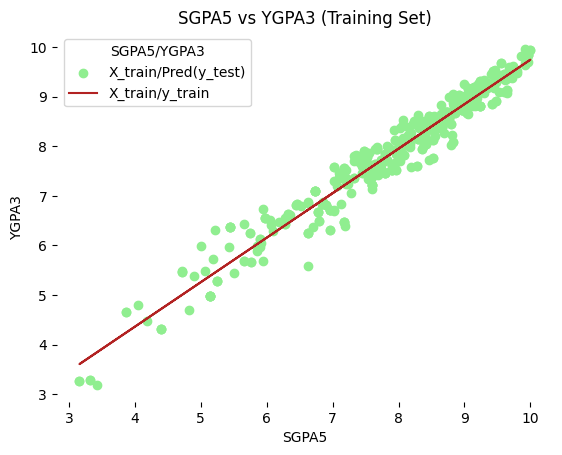

In [21]:
plt.scatter(X_train, y_train, color = 'lightgreen') #lightcoral
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('SGPA5 vs YGPA3 (Training Set)')
plt.xlabel('SGPA5')
plt.ylabel('YGPA3')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'],
title = 'SGPA5/YGPA3', loc='best', facecolor='white')
plt.box(False)
plt.show()

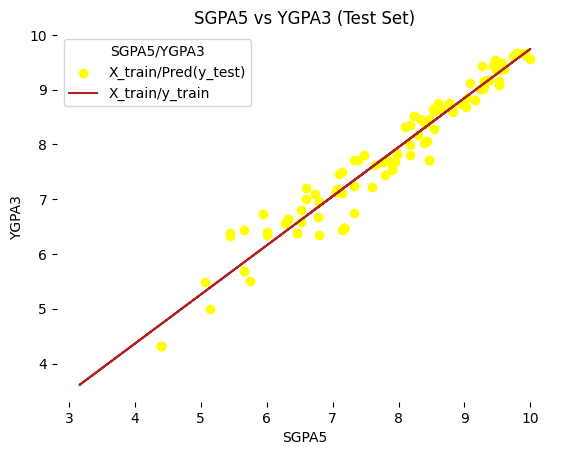

In [22]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('SGPA5 vs YGPA3 (Test Set)')
# replace Years of Experience with Age
plt.xlabel('SGPA5')
# replace Years of Experience with Age
plt.ylabel('YGPA3')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'],
title = 'SGPA5/YGPA3', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [23]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[0.89670365]]
Intercept: [0.77577507]
